# Import Library


In [ ]:
import re
import pandas as pd
import numpy as np
import datetime as dt
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
# from google_play_scraper import Sort, reviews_all, reviews
import nltk
# import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# DATASET

In [ ]:
import pandas as pd

df = pd.read_csv('scrapp.csv')
df

,conversation_id_str,created_at,favorite_count,Tweet,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.790000e+18,Thu May 02 06:50:01 +0000 2024,0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,1.790000e+18,NaN,C_D3pp,in,"Sukabumi, Indonesia",0.0,0.0,0.0,https://twitter.com/Sijampang_ngora/status/178...,3.177673e+08,Sijampang_ngora
1,1.790000e+18,Thu May 02 06:47:39 +0000 2024,0,bukan maen how long bea cukai can go~,1.790000e+18,NaN,NaN,in,NaN,0.0,0.0,0.0,https://twitter.com/wanggar_/status/1785924093...,8.310000e+17,wanggar_
2,1.790000e+18,Thu May 02 06:47:16 +0000 2024,0,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,1.790000e+18,NaN,lazuandi,in,NaN,0.0,0.0,0.0,https://twitter.com/Zakf25/status/178592399539...,1.480000e+18,Zakf25
3,1.790000e+18,Thu May 02 06:46:52 +0000 2024,0,SYL kalo jadi kepala Bea Cukai punya paman di ...,1.790000e+18,NaN,NaN,in,NaN,0.0,0.0,0.0,https://twitter.com/BapacknyaAruna/status/1785...,9.640000e+17,BapacknyaAruna
4,1.790000e+18,Thu May 02 06:45:39 +0000 2024,0,@NephilaXmus @prastow Bea cukai bisa sepi kala...,1.790000e+18,NaN,NephilaXmus,in,Indonesia,0.0,0.0,0.0,https://twitter.com/XRenSteve/status/178592358...,1.680000e+18,XRenSteve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,1.790000e+18,Wed May 01 06:44:30 +0000 2024,0,@pejabrut Semoga buruh negara khususnya buruh ...,1.790000e+18,NaN,pejabrut,in,Norway,0.0,0.0,0.0,https://twitter.com/slowmotion5678/status/1785...,1.760000e+18,slowmotion5678
1415,1.780000e+18,Wed May 01 06:44:30 +0000 2024,0,@tvOneNews Bea cukai bukan keranjang sampah te...,1.790000e+18,NaN,tvOneNews,in,NaN,0.0,0.0,0.0,https://twitter.com/Ayat_dhen/status/178556091...,1.700000e+18,Ayat_dhen
1416,1.790000e+18,Wed May 01 06:44:19 +0000 2024,0,jadi mikir berkali2 mau hobby beginian WKWKWKW...,1.790000e+18,NaN,NaN,in,di dalam jerawat kamu,0.0,0.0,0.0,https://twitter.com/D_herman007/status/1785560...,2.302046e+09,D_herman007
1417,1.790000e+18,Wed May 01 06:40:50 +0000 2024,0,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...,1.790000e+18,NaN,NaN,in,NaN,0.0,0.0,0.0,https://twitter.com/nur1_siska/status/17855599...,1.490000e+18,nur1_siska


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      1418 non-null   float64
 1   created_at               1419 non-null   object 
 2   favorite_count           1419 non-null   int64  
 3   Tweet                    1419 non-null   object 
 4   id_str                   1419 non-null   float64
 5   image_url                85 non-null     object 
 6   in_reply_to_screen_name  865 non-null    object 
 7   lang                     1418 non-null   object 
 8   location                 820 non-null    object 
 9   quote_count              1417 non-null   float64
 10  reply_count              1417 non-null   float64
 11  retweet_count            1417 non-null   float64
 12  tweet_url                1417 non-null   object 
 13  user_id_str              1417 non-null   float64
 14  username                

In [ ]:
df.isnull().sum()

conversation_id_str           1
created_at                    0
favorite_count                0
Tweet                         0
id_str                        0
image_url                  1334
in_reply_to_screen_name     554
lang                          1
location                    599
quote_count                   2
reply_count                   2
retweet_count                 2
tweet_url                     2
user_id_str                   2
username                      2
dtype: int64

In [ ]:
# Menghitung data yang memiliki value kosong []
count_columns_with_empty_string = (df == '[]').sum()
print(count_columns_with_empty_string)

conversation_id_str        0
created_at                 0
favorite_count             0
Tweet                      0
id_str                     0
image_url                  0
in_reply_to_screen_name    0
lang                       0
location                   0
quote_count                0
reply_count                0
retweet_count              0
tweet_url                  0
user_id_str                0
username                   0
dtype: int64


In [ ]:
df.duplicated().sum()

502

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(917, 15)

In [ ]:
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'Tweet',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [ ]:
# Kolom yang ingin dihapus
columns_to_drop = ['conversation_id_str', 'created_at', 'favorite_count',
                   'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
                   'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
                   'user_id_str', 'username']

# Filter kolom yang ada dalam DataFrame
columns_in_df = [col for col in columns_to_drop if col in df.columns]

# Hapus kolom yang ada
df.drop(columns_in_df, axis=1, inplace=True)

# Tampilkan DataFrame
df.head()


,Tweet
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...
1,bukan maen how long bea cukai can go~
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai
3,SYL kalo jadi kepala Bea Cukai punya paman di ...
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...


In [ ]:
df.shape

(917, 1)

# PREPROS

In [ ]:
# Membuang kolom kutipan yang berisi string kosong []
df = df.loc[df['Tweet'] != '[]']

count_columns_with_empty_string = (df == '[]').sum()
print(count_columns_with_empty_string)

Tweet    0
dtype: int64


In [ ]:
df['Tweet'][4]

'@NephilaXmus @prastow Bea cukai bisa sepi kalau dicek satu satu'

In [ ]:
df['Tweet'][7]

'@s0ndelurus Bea cukai?'

**stopword**

In [ ]:
id_stopword_dict = pd.read_csv('stopword.csv', header=None, encoding='latin-1')
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})
id_stopword_dict.head()


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [ ]:
stopword_id = pd.read_csv('stopwordbahasa.csv', header=None, encoding='latin-1')
stopword_id = stopword_id.rename(columns={0: 'stopword'})
stopword_id.head()

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [ ]:
stopword_ing = pd.read_csv('ST.csv', header=None, encoding='latin-1')
stopword_ing = stopword_ing.rename(columns={0: 'stopword'})
stopword_ing.head()

,stopword
0,a
1,a's
2,able
3,about
4,above


In [ ]:
swear_dict = pd.read_csv('swear_words.csv', header=None, encoding='latin-1')
swear_dict = swear_dict.rename(columns={0: 'swear_words'})
swear_dict.head()

,swear_words
0,anjing
1,anjiang
2,anjir
3,anjay
4,anjai


In [ ]:
slang_dict = pd.read_csv('slang_words.csv',  encoding='latin-1')
slang_dict.tail()

,original,replacement
1034,emg,memang
1035,karwna,karena
1036,smtra,sementara
1037,slh1,salah satu
1038,krjsm,kerja sama


In [ ]:
import pandas as pd

alay_dict = pd.read_csv('new_kamusalay.csv', header=None, encoding='latin-1')
alay_dict = alay_dict.rename(columns={0: 'original',
                                     1: 'replacement'})
alay_dict.head()

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [ ]:
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
# # def normalize_alay(word):
# #     words = word.split(',')
# #     return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in words.split(',')])

def convert_abbrev(word):
    if ',' in word:
        # Jika ada koma, pisahkan kata dan cek kamus
        words = word.split(',')
        return ', '.join(alay_dict_map.get(w.lower(), w) for w in words)
    elif word.startswith('@'):
        # Memisahkan kata dari kode seperti 'ger/rus/eng'
        code_word = word[1:]
        return alay_dict_map.get(code_word, word)
    else:
        # Menggunakan kamus untuk mengganti kata
        return alay_dict_map.get(word.lower(), word)

# Mengaplikasikan fungsi pada DataFrame
df['preprocess'] = df['Tweet'].astype(str).apply(lambda x: ' '.join(convert_abbrev(word) for word in x.split()))
df



,Tweet,preprocess
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,@C_D3pp pantas saja pegawai bea cukai kaya kay...
1,bukan maen how long bea cukai can go~,bukan main how long bea cukai can go~
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,@lazuandi @medyrenaldy_ ramaikan akun bea cukai
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,SYL kalau jadi kepala Bea Cukai punya paman di...
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,@NephilaXmus @prastow Bea cukai bisa sepi kala...
...,...,...
1414,@pejabrut Semoga buruh negara khususnya buruh ...,@pejabrut Semoga buruh negara khususnya buruh ...
1415,@tvOneNews Bea cukai bukan keranjang sampah te...,@tvOneNews Bea cukai bukan keranjang sampah te...
1416,jadi mikir berkali2 mau hobby beginian WKWKWKW...,jadi pikir berkali kali mau hobi beginian wkwk...
1417,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...


In [ ]:
df["preprocess"][15]

'@tanyakanrl sepertinya karena imei deh biasanya kalau imei ke blok ngurusnya di bea cukai terus kalau masih tidak bisa paling pakai wifi aja. kalau jual handphone inter begitu agak susah sih jadi tak tau harganya berapa'

In [ ]:
df["preprocess"][88]

'bea cukai started apologizing and fixing their fucked up sistem challege failed'

In [ ]:
df["preprocess"][915]

'memang cuma bea cukai doang yang boleh mungut? https://t.co/jzSFl217vX'

In [ ]:
df["preprocess"][103]

'@randomnus Kayaknya di temlenku yang ini juga lebih sibuk sama bea cukai wkwk tapi kalau ada masalah kayak climate atau palestina pokoknya yang lintas negara lini masa fandom biasanya lebih gerak cepat'

In [ ]:
pip install sastrawi

In [ ]:
pip install num2words

In [ ]:
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import html
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

punct = string.punctuation
def remove_punctuation(text):
    no_punct= [words for words in text if words not in punct]
    words_wo_punct = ''.join(no_punct)

    return words_wo_punct

def remove_unnecessary_char(text):
    text = re.sub('\n', ' ', text) # Remove every '\n'
    text = re.sub('user', ' ', text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) # Remove every url
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = re.sub('@[\w_]+', ' ', text) # Remove @
    text = re.sub('#[\w_]+', ' ', text) # Remove tag hashtag
    text = re.sub('Ã¢Â€Â™', "'",text)
    text = re.sub('â', "",text)
    text = re.sub('\d+', '', text)

    return text

def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    text = re.sub(r"(.)\1{2,}", r"\1", text)
    return text

def remove_stopword(text):
    text = ' '.join([ ' ' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def remove_stopword_id(text):
    text = ' '.join([ ' ' if word in stopword_id.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def remove_stopword_ing(text):
    text = ' '.join([ ' ' if word in stopword_ing.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text


import num2words

def convert_number_to_words(number):
    if isinstance(number, str) and number.isdigit():
        number = int(number)
    if isinstance(number, int):
        return num2words.num2words(number)
    else:
        return number

def stemming (text):
    return stemmer.stem(text)

# Fungsi untuk menghapus kata-kata yang hanya berisi huruf konsonan
def remove_consonant_words(text):
    # Pola untuk menemukan kata-kata yang hanya berisi huruf konsonan
    pattern = r'\b[b-df-hj-np-tv-z]+\b'
    # Menghapus kata-kata yang sesuai dengan pola
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    # Menghilangkan spasi ekstra
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    words = text.split()  # Split text into words based on spaces
    normalized_words = [alay_dict_map[word] if word in alay_dict_map else word for word in words]
    return ' '.join(normalized_words)

def ganti_kata(text):
    text = ' '.join([ ' ' if word in swear_dict.swear_words.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

slang_dict_map = dict(zip(slang_dict['original'],slang_dict['replacement']))
def normalize_slang(text):
    return ' '.join([slang_dict_map[word] if word in slang_dict_map else word for word in text.split(' ')])

def remove_duplicate_words(text):
    words = text.split()  # Memisahkan teks menjadi kata-kata individual
    seen = set()  # Menggunakan set untuk melacak kata yang telah ditemukan
    result = []  # Menyimpan kata-kata hasil yang unik

    for word in words:
        if word not in seen:
            seen.add(word)
            result.append(word)

    return ' '.join(result)

def remove_small_words(text):   #menghapus kata yang terdiri dari 3 huruf
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

def remove_extra_whitespaces(text): #menghapus spasi berlebih
  review = re.sub(r'\s+',' ', text)
  return review


In [ ]:
def preprocess1(text):
    text = html.unescape(text)
    text= convert_number_to_words(text)
    text = lowercase (text) # 1
    text = remove_unnecessary_char(text)
    return text

In [ ]:
df['preprocess'] = df['preprocess'].apply(preprocess1)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import words
nltk.download('words')

# Daftar kata bahasa Inggris
english_words = set(words.words())

def contains_english(text, threshold=0.2):
    words_in_text = text.split()
    if len(words_in_text) == 0:  # Cek apakah teks kosong
        return False
    detected_words = [word for word in words_in_text if word.lower() in english_words]
    english_word_count = len(detected_words)
    return english_word_count / len(words_in_text) > threshold

# Terapkan fungsi contains_english ke kolom teks dan ekstrak hasilnya
df['is_english'] = df['preprocess'].apply(contains_english)
df



[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


,Tweet,preprocess,is_english
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,pantas saja pegawai bea cukai kaya kaya bang...,False
1,bukan maen how long bea cukai can go~,bukan main how long bea cukai can go~,True
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,ramaikan akun bea cukai,False
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,syl kalau jadi kepala bea cukai punya paman di...,False
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,bea cukai bisa sepi kalau dicek satu satu,False
...,...,...,...
1414,@pejabrut Semoga buruh negara khususnya buruh ...,semoga buruh negara khususnya buruh bea cuka...,False
1415,@tvOneNews Bea cukai bukan keranjang sampah te...,bea cukai bukan keranjang sampah tetapi beac...,False
1416,jadi mikir berkali2 mau hobby beginian WKWKWKW...,jadi pikir berkali kali mau hobi beginian wkwk...,False
1417,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...,bea cukai bagi tips barang impor tak didenda u...,False


In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
from googletrans import Translator

# Inisialisasi penerjemah Google Translate
translator = Translator()

# Fungsi untuk menerjemahkan teks berdasarkan nilai kolom is_english
def detect_and_translate(row):
    try:
        if row['is_english']:
            translation = translator.translate(row['preprocess'], src='en', dest='id')
            return translation.text
        else:
            return row['preprocess']  # Kembalikan kalimat aslinya jika tidak ada kata bahasa Inggris yang terdeteksi
    except Exception as e:
        return f"Error: {str(e)}"

# Terapkan fungsi detect_and_translate ke DataFrame menggunakan apply dengan axis=1
df['translated_tweet'] = df.apply(detect_and_translate, axis=1)

# Tampilkan DataFrame
df


,Tweet,preprocess,is_english,translated_tweet
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,pantas saja pegawai bea cukai kaya kaya bang...,False,pantas saja pegawai bea cukai kaya kaya bang...
1,bukan maen how long bea cukai can go~,bukan main how long bea cukai can go~,True,Bukan Main Berapa lama bea cukai bisa ~
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,ramaikan akun bea cukai,False,ramaikan akun bea cukai
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,syl kalau jadi kepala bea cukai punya paman di...,False,syl kalau jadi kepala bea cukai punya paman di...
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,bea cukai bisa sepi kalau dicek satu satu,False,bea cukai bisa sepi kalau dicek satu satu
...,...,...,...,...
1414,@pejabrut Semoga buruh negara khususnya buruh ...,semoga buruh negara khususnya buruh bea cuka...,False,semoga buruh negara khususnya buruh bea cuka...
1415,@tvOneNews Bea cukai bukan keranjang sampah te...,bea cukai bukan keranjang sampah tetapi beac...,False,bea cukai bukan keranjang sampah tetapi beac...
1416,jadi mikir berkali2 mau hobby beginian WKWKWKW...,jadi pikir berkali kali mau hobi beginian wkwk...,False,jadi pikir berkali kali mau hobi beginian wkwk...
1417,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...,bea cukai bagi tips barang impor tak didenda u...,False,bea cukai bagi tips barang impor tak didenda u...


In [ ]:
def preprocess2(text):
    text = html.unescape(text)
    text= convert_number_to_words(text)
    text = lowercase (text) # 1
    text = remove_unnecessary_char(text)
    text = remove_nonaplhanumeric(text)
    text = normalize_alay (text)
    text = normalize_slang (text)
    # text = stemming(text)
    text = ganti_kata (text)
    text = remove_stopword (text)
    text = remove_stopword_id (text)
    text = remove_stopword_ing (text)
    text= remove_punctuation(text)
    text = stemming(text)
    text = remove_duplicate_words(text)
    text = normalize_alay (text)
    text = remove_consonant_words(text)
    text= remove_small_words(text)
    text= remove_extra_whitespaces(text)
    return text

In [ ]:
df['preprocess'] = df['translated_tweet'].apply(preprocess2)

In [ ]:
from googletrans import Translator

# Inisialisasi penerjemah
translator = Translator()

# Fungsi untuk menerjemahkan teks
def translate_text(text, src='en', dest='id'):
    translated = translator.translate(text, src=src, dest=dest)
    return translated.text

# Contoh penggunaan
text_to_translate = 'Dimana-mana ada template-nya ngurus begituan jika prosedurnya tetap dan sama ya sediakan template dokumen. Di Imigrasi Pajak dan sebagainya ada template dokumen jika diwajibkan. Good governance bukan berarti dibebaskan ngasih dokumen. Bea Cukai kok Good Governance.'
translated_text = translate_text(text_to_translate)

print("Original text:", text_to_translate)
print("Translated text:", translated_text)


Original text: Dimana-mana ada template-nya ngurus begituan jika prosedurnya tetap dan sama ya sediakan template dokumen. Di Imigrasi Pajak dan sebagainya ada template dokumen jika diwajibkan. Good governance bukan berarti dibebaskan ngasih dokumen. Bea Cukai kok Good Governance.
Translated text: Dimana-Mana Ada Template-Ngurus Begituan Jika Prosedurnya Tetap Dan Sama Ya Sediakan Template Dokumen.Di imigrasi pajak dan sebagainya ada template dokumen jika diwajibkan.Pemerintahan yang Baik Bukan Berarti Dibebaska Ngasih Dokumen.Bea CUKAI KOK Tata Kelola yang Baik.


In [ ]:
# df.drop(columns=['is_english', 'translated_tweet'], inplace=True)
df.to_csv('sudah.csv', index=False)

In [ ]:
import pandas as pd

data1 = pd.read_csv("sudah.csv")
data1

,Tweet,preprocess,is_english,translated_tweet
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,pegawai kaya,False,pantas saja pegawai bea cukai kaya kaya bang...
1,bukan maen how long bea cukai can go~,main,True,Bukan Main Berapa lama bea cukai bisa ~
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,ramai akun,False,ramaikan akun bea cukai
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,kepala paman mahkamah konstitusi bapak preside...,False,syl kalau jadi kepala bea cukai punya paman di...
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,sepi,False,bea cukai bisa sepi kalau dicek satu satu
...,...,...,...,...
912,@pejabrut Semoga buruh negara khususnya buruh ...,buruh negara zalim rakyat,False,semoga buruh negara khususnya buruh bea cuka...
913,@tvOneNews Bea cukai bukan keranjang sampah te...,keranjang sampah beacukailah,False,bea cukai bukan keranjang sampah tetapi beac...
914,jadi mikir berkali2 mau hobby beginian WKWKWKW...,pikir kali hobi ribet,False,jadi pikir berkali kali mau hobi beginian wkwk...
915,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...,tips barang impor denda viral sepatu,False,bea cukai bagi tips barang impor tak didenda u...


In [ ]:
print(f"sebelum di preprocessing:\n{df['Tweet'][47]}\n")
print(f"sesudah di preprocessing:\n{data1['preprocess'][47]}\n")

sebelum di preprocessing:
@C_D3pp mending ngitu nanti beredar di Tokopedia itu kalau mulus masuk kantung pribadi barang bawaan luar negeri di bikin sulit dan mahal barang branded biar kagak di tebus dan bisa foya foya dengan menjual barang itu emang lebih najis daripada najis itu Bea Cukai

sesudah di preprocessing:
edar tokopedia mulus masuk kantung pribadi barang bawa negeri bikin sulit mahal merek tebus foya jual najis 



In [ ]:
data1.isnull().sum()

Tweet                0
preprocess          35
is_english           0
translated_tweet     0
dtype: int64

In [ ]:
data1['preprocess'].fillna('', inplace=True)
data1['Tweet'].fillna('', inplace=True)

In [ ]:
data1.isnull().sum()

Tweet               0
preprocess          0
is_english          0
translated_tweet    0
dtype: int64

# WORDCLOUD

In [ ]:
review_all = []

for review in data1['preprocess']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Streaming output truncated to the last 5000 lines.
surga
kena
palak
tinggal
koreng
kerupuk
langsung
ramaai
sakit
temu
maaf
membludak
jual
garmin
cikal
pelopor
juta
forerunner
solar
pesan
orang
bersih
baju
hitam
makan
duit
haram
kerja
daerah
eropa
melulu
pusing
kena
kali
price
parkir
ilegal
jatah
preman
negara
heboh
akibat
megatron
sasar
kantor
unboxing
medy
renaldy
clear
ramai
masalah
konsultan
pajak
mungkin
peluang
usaha
bagus
cewek
baju
ketat
kayak
regulasi
robot
koin
hilan
cuku
jual
marketplace
kira
lokasi
bandara
soetta
rusak
tugas
atur
lihat
mana
warganet
sorot
kaya
direktur
jenderal
capai
rupiah
miliar
salah
jabat
wajar
dapat
teman
doang
mungut
pakai
ajak
bayar
badan
benar
respon
mual
tolong
kasihan
cocok
main
jelek
jmbret
handphone
influencer
bima
yudho
tawar
buzzer
warganet
salah
sasar
fungsi
uang
rakyat
baik
citra
gaduh
viral
gerak
mental
malak
sekolah
alat
ajar
tagih
ratus
juta
maaf
lantik
tolong
baik
pangkas
prosedur
serta
situ
investasi
aman
returnnya
gede
pegawai
paji
jari

In [ ]:
# menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna

freq_dist = FreqDist(review_all)
print("Banyak distribusi frekuensi")
freq_dist

Banyak distribusi frekuensi


FreqDist({'pajak': 87, 'tahan': 85, 'pegawai': 64, 'barang': 57, 'kerja': 56, 'kaya': 47, 'tugas': 46, 'bayar': 38, 'negara': 37, 'jenderal': 37, ...})

In [ ]:
# menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('pajak', 87), ('tahan', 85), ('pegawai', 64), ('barang', 57), ('kerja', 56), ('kaya', 47), ('tugas', 46), ('bayar', 38), ('negara', 37), ('jenderal', 37), ('rakyat', 36), ('korupsi', 36), ('megatron', 33), ('viral', 33), ('kayak', 31), ('jabat', 31), ('buzzer', 30), ('masuk', 30), ('juta', 29), ('salah', 28), ('sekolah', 27), ('uang', 26), ('perintah', 26), ('direktur', 26), ('kena', 25), ('cuku', 24), ('duit', 23), ('sorot', 23), ('harta', 22), ('bang', 21), ('negeri', 21), ('main', 20), ('pakai', 20), ('unboxing', 20), ('harga', 20), ('kasih', 20), ('bawa', 20), ('baca', 20), ('kirim', 20), ('ajar', 19), ('alat', 19), ('rupiah', 19), ('coba', 19), ('baik', 19), ('langsung', 19), ('menteri', 18), ('bantu', 18), ('atur', 18), ('bikin', 17), ('impor', 17), ('lihat', 17), ('terima', 17), ('pikir', 17), ('tolong', 17), ('bima', 16), ('bilang', 16), ('malu', 16), ('gaji', 16), ('askolani', 16), ('beli', 15), ('kali', 15), ('takut', 15), ('maaf', 15), ('ramai', 14), ('bagus', 14), ('palak

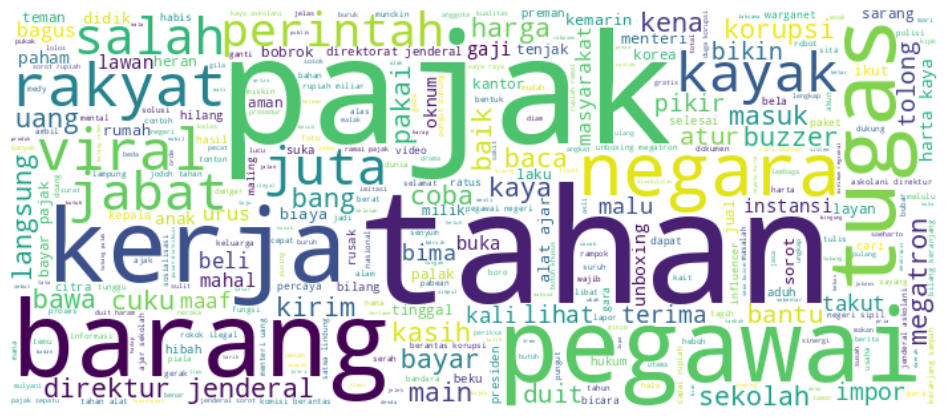

In [ ]:
# membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# memasukkan 500 sampel kata beserta jumlah kemunculan ke dalam dataframe

most_freq_df = pd.DataFrame(common_review, columns=['words','count'])
most_freq_df.sort_values(by='count', ascending=False)

,words,count
0,pajak,87
1,tahan,85
2,pegawai,64
3,barang,57
4,kerja,56
...,...,...
400,jujur,3
399,warga,3
398,jari,3
397,awas,3


In [ ]:
# mengurutkan kata sampel berdasarkan jumlah kemunculan yang diurutkan secara descending
# kemudian mengambil 15 kata sampel

most_freq_df.sort_values(by='count', ascending=False)
top15 = most_freq_df.iloc[:15]

<ipython-input-407-b316f6582adf>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




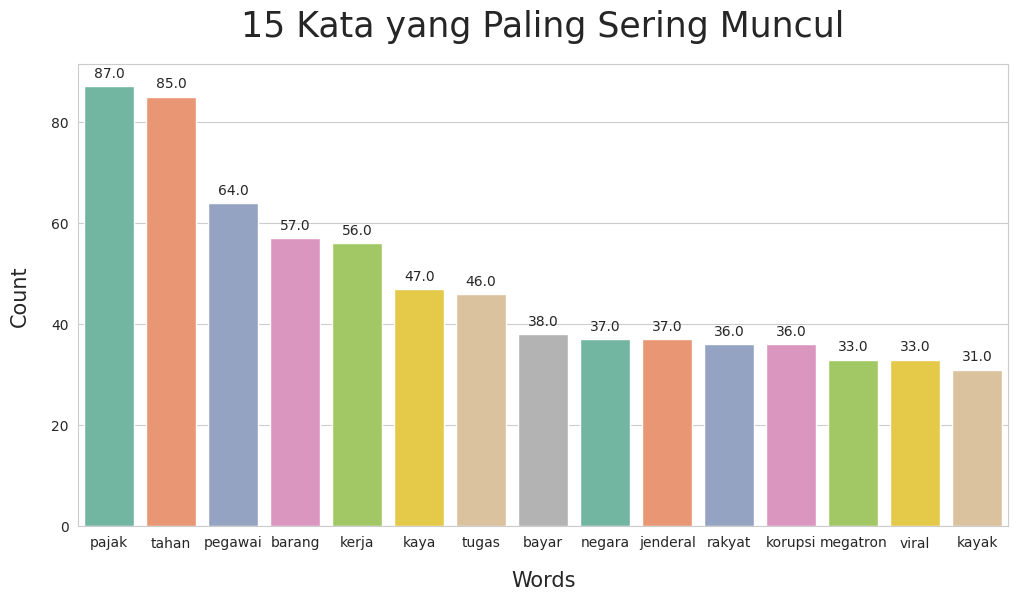

In [ ]:
# membuat visualisasi 15 sampel kata yang paling sering dibicarakan oleh pengguna

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

ax = sns.barplot(x='words', y='count', data=top15, palette = 'Set2')
for annotate in ax.patches:
  ax.annotate(format(annotate.get_height(), '.1f'),
              (annotate.get_x() + annotate.get_width()/2.,
               annotate.get_height()), ha = 'center', va='center', xytext=(0,9),
               textcoords = 'offset points')
plt.title("15 Kata yang Paling Sering Muncul", fontsize=25, pad=20)
plt.xlabel('Words', fontsize=15, labelpad=15)
plt.ylabel('Count', fontsize=15, labelpad=15)
plt.show()

# DATA LABELING

**Ulasan masih belum mempunyai sentimen sehingga sulit untuk mencari tahu apakah pengguna memberikan ulasan positif atau negatif. Proses pemberian sentimen tidak mungkin dilakukan secara manual dengan melihat ulasan secara satu per satu karena membutuhkan waktu yang lama dan memerlukan seorang ahli di bidang bahasa yang dapat menafsirkan ulasan kemudian mengelompokkan ke sentimen positif dan negatif. Maka dari itu, saya melakukan proses pemberian label sentimen dengan menerapkan metode yang berbasis lexicon atau biasa dikenal dengan lexicon-based method. Kamus yang digunakan adalah InSet Lexicon yang terdiri dari kamus positif dan negatif.**

# Read the positive and negative lexicon

In [ ]:
lexicon_positive = dict()
import csv
with open('lexicon_positive_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative_ver1.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

# Creat a function name sentiment_analysis_lexicon indo which contains a for loop and if conditions to label

# Ulasan diberi score terlebih dahulu dengan menyesuaikan dengan bobot kata yang terdapat di kamus. +5 untuk kata positif dan -5 untuk negatif. Setelah itu, bobot ulasan dijumlahkan kemudian di kelompokkan menjadi sentimen positif, negatif, dan netral. netral ini diartikan sebagai hasil kalkulasi ulasan bernilai 0. Karena fokus analisis ini hanya sentimen positif dan negatif, maka ulasan yang mengandung sentimen netral nanti akan di hilangkan.

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    if isinstance(text, float) and np.isnan(text):
        return 0, 'netral'  # Handle NaN case
    score = 0
    for word_pos in text:
        if word_pos in lexicon_positive:
            score += lexicon_positive[word_pos]
    for word_neg in text:
        if word_neg in lexicon_negative:
            score += lexicon_negative[word_neg]
    polarity = ''
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'
    return score, polarity

#  Separate the sentences in the preprocess column and then apply the sentiment_analysis_lexicon_indonesia function to that column

In [ ]:
data1['prepos_text'] = data1.preprocess.str.split()

In [ ]:
data1

,Tweet,preprocess,is_english,translated_tweet,prepos_text
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,pegawai kaya,False,pantas saja pegawai bea cukai kaya kaya bang...,"[pegawai, kaya]"
1,bukan maen how long bea cukai can go~,main,True,Bukan Main Berapa lama bea cukai bisa ~,[main]
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,ramai akun,False,ramaikan akun bea cukai,"[ramai, akun]"
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,kepala paman mahkamah konstitusi bapak preside...,False,syl kalau jadi kepala bea cukai punya paman di...,"[kepala, paman, mahkamah, konstitusi, bapak, p..."
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,sepi,False,bea cukai bisa sepi kalau dicek satu satu,[sepi]
...,...,...,...,...,...
912,@pejabrut Semoga buruh negara khususnya buruh ...,buruh negara zalim rakyat,False,semoga buruh negara khususnya buruh bea cuka...,"[buruh, negara, zalim, rakyat]"
913,@tvOneNews Bea cukai bukan keranjang sampah te...,keranjang sampah beacukailah,False,bea cukai bukan keranjang sampah tetapi beac...,"[keranjang, sampah, beacukailah]"
914,jadi mikir berkali2 mau hobby beginian WKWKWKW...,pikir kali hobi ribet,False,jadi pikir berkali kali mau hobi beginian wkwk...,"[pikir, kali, hobi, ribet]"
915,Bea Cukai Bagi Tips Barang Impor Tak Didenda U...,tips barang impor denda viral sepatu,False,bea cukai bagi tips barang impor tak didenda u...,"[tips, barang, impor, denda, viral, sepatu]"


In [ ]:
results = data1['prepos_text'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data1['polarity_score'] = results[0]
data1['polarity'] = results[1]
print(data1['polarity'].value_counts())

polarity
negatif    523
positif    247
netral     147
Name: count, dtype: int64


In [ ]:
# mengonversikan whitespaces menjadi np.nan kemudian menghapusnya menggunakan fungsi dropna
data1 = data1.replace('',np.nan, regex=True)
data1 = data1.dropna()

In [ ]:
# reset index tabel agar urutan menjadi penomoran menjadi lebih rapih
data1 = data1.reset_index(drop=True)

In [ ]:
print(data1['polarity'].value_counts())

polarity
negatif    523
positif    247
netral     112
Name: count, dtype: int64


In [ ]:
data1[(data1['polarity']=='netral')]

,Tweet,preprocess,is_english,translated_tweet,prepos_text,polarity_score,polarity
1,bukan maen how long bea cukai can go~,main,True,Bukan Main Berapa lama bea cukai bisa ~,[main],0,netral
16,@C_D3pp Bea cukai bubarkan,bubar,False,bea cukai bubarkan,[bubar],0,netral
20,@C_D3pp Bea cukai preman palak negara,preman palak negara,False,bea cukai preman palak negara,"[preman, palak, negara]",0,netral
24,@FirmanSentosa22 @C_D3pp Ngapain oke gas anjer...,aneh,True,APA Oke Gas Anjer.Kan Dari Dulu Bea Cukai Suda...,[aneh],0,netral
31,Bea cukai keren nyari buzzer yang berpendidika...,keren menencari buzzer didik salut bima bicara,True,Bea CUKAI Keren Menencari Buzzer Yang Berpendi...,"[keren, menencari, buzzer, didik, salut, bima,...",0,netral
...,...,...,...,...,...,...,...
819,@madHink Iya pns yg bkn buruh itu pns pajak be...,pegawai negeri sipil buruh pajak,False,iya pegawai negeri sipil yang bukan buruh it...,"[pegawai, negeri, sipil, buruh, pajak]",0,netral
851,@ARSIPAJA Impoooooorrrrrrr.... Bea cukai noooo...,impor,False,impoooooorrrrrrr.... bea cukai noooolllll......,[impor],0,netral
865,@medyrenaldy_ Sobat Bea Cukai,sobat,False,sobat bea cukai,[sobat],0,netral
873,@illukinati Ga cuma bea cukai maksudnya yg lai...,tenjak maksudya bahang,True,Tenjak Cuma Bea CUKAI MAKSUDYA YANG LAIN ADA B...,"[tenjak, maksudya, bahang]",0,netral


# Delete review with neutral sentiment

In [ ]:
# # menghapus content yang bersentimen netral karena tujuan dari penelitian ini hanya menggunakan 2 sentimen yaitu positif dan negatif
# data1 = data1.drop(data1[data1['polarity'] == 'netral'].index)
# data1 = data1.reset_index(drop=True)

In [ ]:
data1.head(20)

,Tweet,preprocess,is_english,translated_tweet,prepos_text,polarity_score,polarity
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,pegawai kaya,False,pantas saja pegawai bea cukai kaya kaya bang...,"[pegawai, kaya]",3,positif
1,bukan maen how long bea cukai can go~,main,True,Bukan Main Berapa lama bea cukai bisa ~,[main],0,netral
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,ramai akun,False,ramaikan akun bea cukai,"[ramai, akun]",-2,negatif
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,kepala paman mahkamah konstitusi bapak preside...,False,syl kalau jadi kepala bea cukai punya paman di...,"[kepala, paman, mahkamah, konstitusi, bapak, p...",-2,negatif
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,sepi,False,bea cukai bisa sepi kalau dicek satu satu,[sepi],-3,negatif
5,eh berarti orang bea cukai harus belajar ttg f...,ajar fashion industri seru buta kayak beda ca...,True,EH BERARTI ORANG BEA CUKAI HARUS BELAJAR TENTA...,"[ajar, fashion, industri, seru, buta, kayak, b...",-3,negatif
6,Gta VI ga rilis-rilis ketahan bea cukai,grand theft auto rilis tahan,True,Grand Theft Auto VI Tidak Rilis-Rilis Ketahan ...,"[grand, theft, auto, rilis, tahan]",2,positif
7,Bea Cukai Bojonegoro Musnahkan 8 Juta Batang R...,bojonegoro musnah juta batang rokok ilegal,False,bea cukai bojonegoro musnahkan juta batang ro...,"[bojonegoro, musnah, juta, batang, rokok, ilegal]",-10,negatif
8,@C_D3pp Kalo ada instansi yang bikin acara tv ...,instansi bikin acara televisi contoh polisi ke...,False,kalau ada instansi yang bikin acara televisi...,"[instansi, bikin, acara, televisi, contoh, pol...",-6,negatif
9,@Artic_monkey12 Mending d lelang trus sumbangi...,lelang sumbang beli imitasi,False,mending di lelang terus sumbangin ke bea cuk...,"[lelang, sumbang, beli, imitasi]",-4,negatif


# Sentimen Visualisasi

<ipython-input-419-441463018a6a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




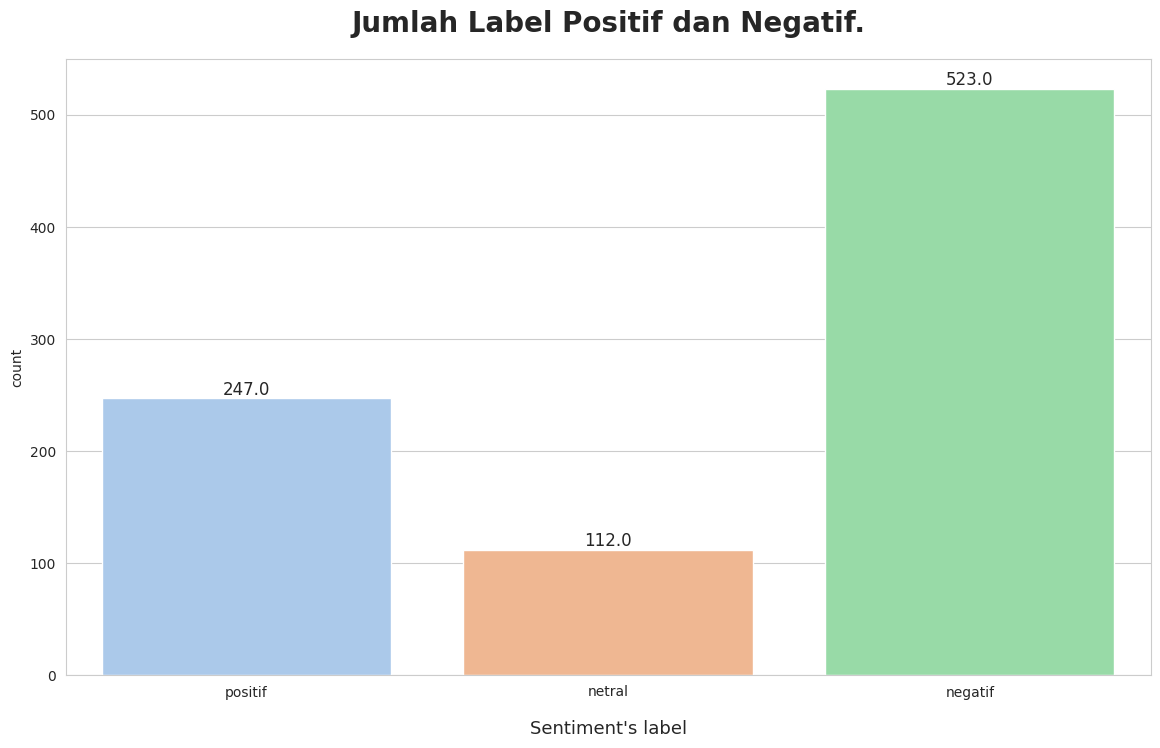

In [ ]:
# membuat visualisasi bar chart untuk menampilkan jumlah sentimen positif dan negatif

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='polarity', data=data1, palette="pastel")

for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 3.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

plt.title("Jumlah Label Positif dan Negatif.", fontsize=20, fontweight='bold',pad=20)
plt.xlabel("Sentiment's label", fontsize=13, labelpad=15)
plt.ylim(0)
plt.show()

In [ ]:
# mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif
# polarity = []
# for convert in data1['polarity']:
#   if convert == "positif":
#     num_polarity = 1
#   else:
#     num_polarity = -1

#   polarity.append(num_polarity)
# data1['polarity'] = polarity

In [ ]:
data1['polarity']

0      positif
1       netral
2      negatif
3      negatif
4      negatif
        ...   
877    negatif
878    negatif
879    negatif
880    positif
881    negatif
Name: polarity, Length: 882, dtype: object

In [ ]:
data1.polarity.value_counts()

polarity
negatif    523
positif    247
netral     112
Name: count, dtype: int64

In [ ]:
print("percentage of sentiment:")
train_pct_pos = data1.polarity.value_counts()[1]/data1.polarity.value_counts().sum()*100
print("percentage of positive sentiment:", round(train_pct_pos,2), '%')

train_pct_neg = data1.polarity.value_counts()[-1]/data1.polarity.value_counts().sum()*100
print("percentage of negative sentiment:", round(train_pct_neg,2), '%')

print("difference between percentage positive and negative:", round(train_pct_pos-train_pct_neg,2), '%')

percentage of sentiment:
percentage of positive sentiment: 28.0 %
percentage of negative sentiment: 12.7 %
difference between percentage positive and negative: 15.31 %


# SENTIMENT WORDCLOUD

# wordcloud for positive sentiment

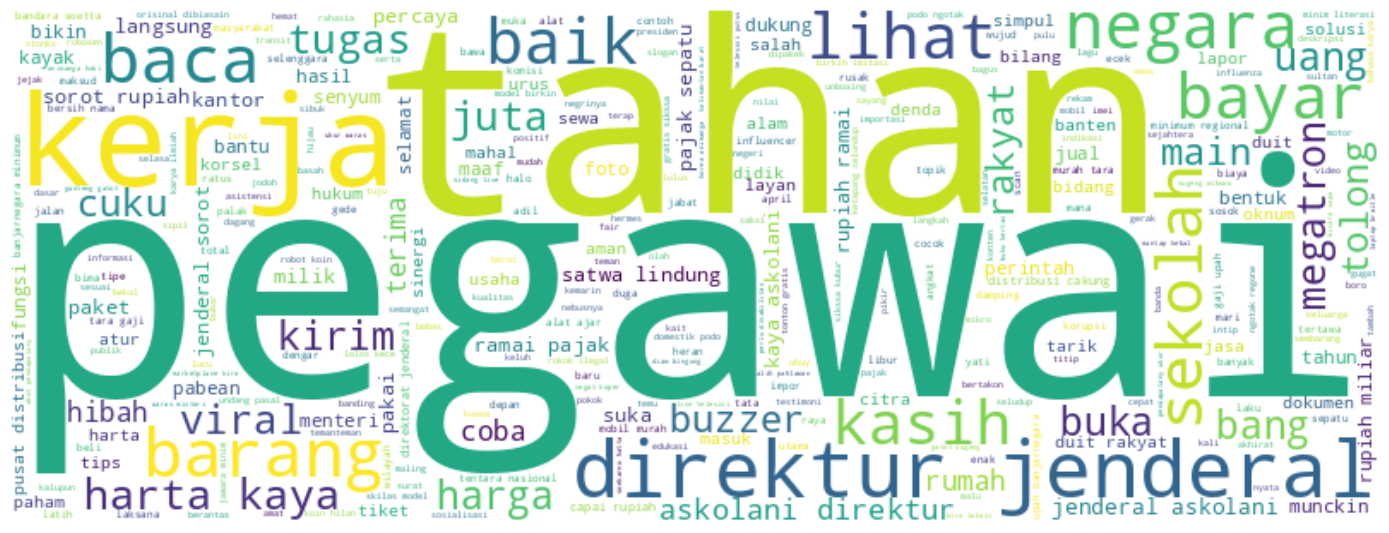

In [ ]:
sentiment_pos = ' '.join([review for review in data1['preprocess'][data1['polarity'] == 'positif']])

# create object wordcloud
w_pos = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_pos)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_pos, interpolation="bilinear")
plt.show()

# wordcloud for negative sentiment

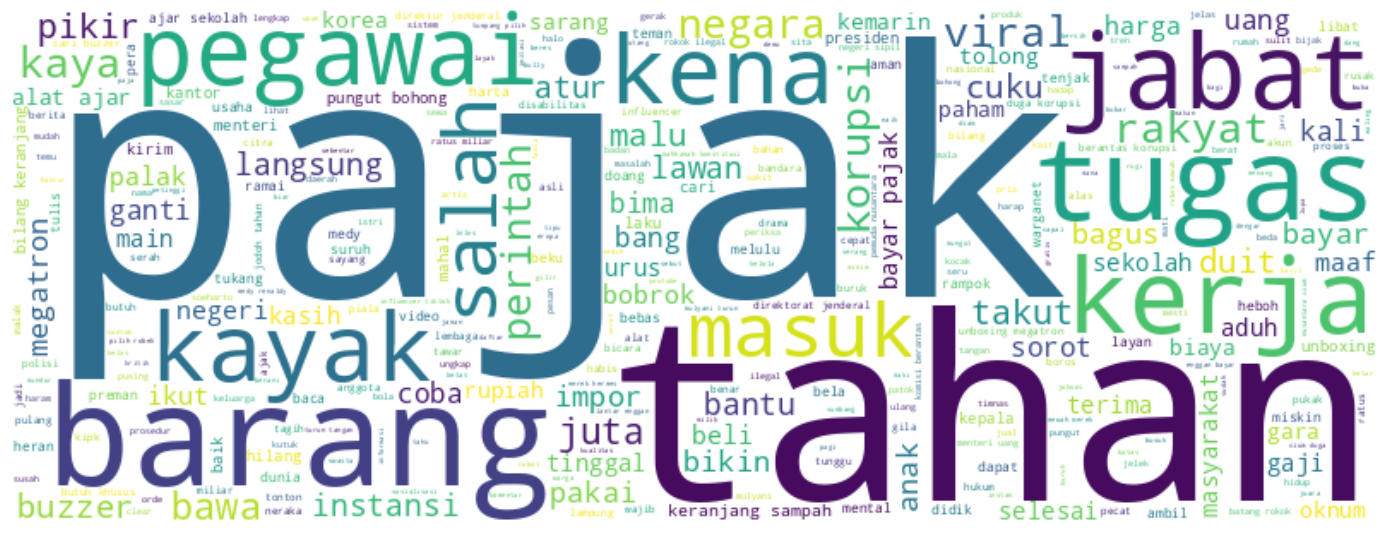

In [ ]:
sentiment_neg = ' '.join([review for review in data1['preprocess'][data1['polarity'] == 'negatif']])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(sentiment_neg)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

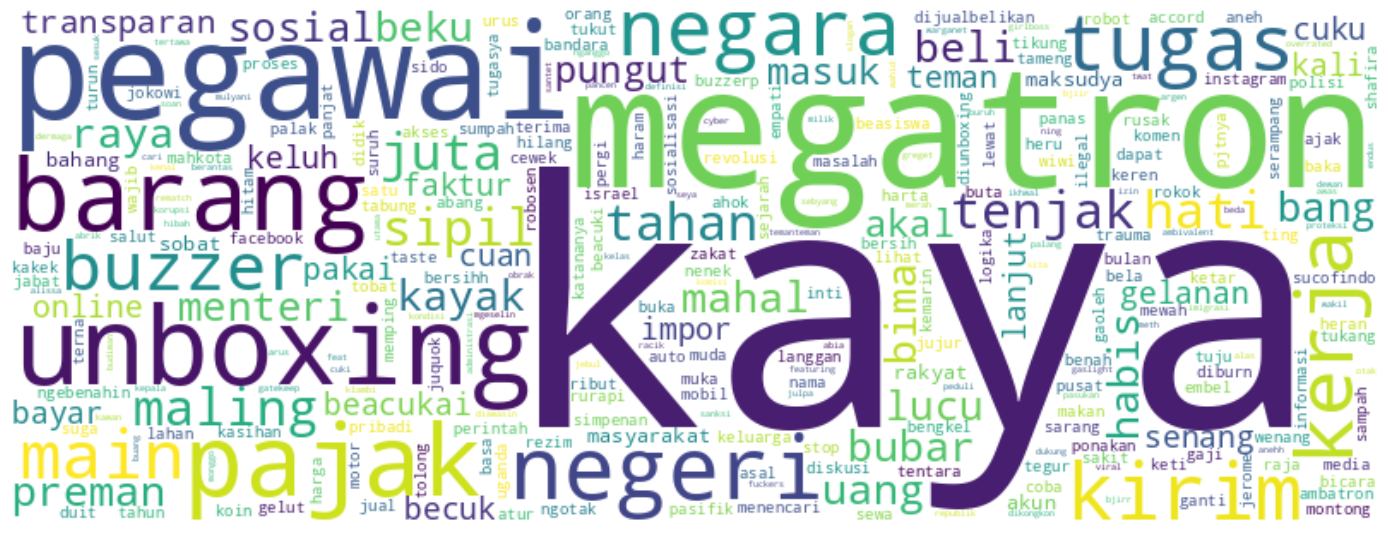

In [ ]:
netral = ' '.join([review for review in data1['preprocess'][data1['polarity'] == 'netral']])

# create object wordcloud
w_neg = WordCloud(background_color="white",
                  width=800, height=300, max_font_size=200,
                  max_words=500).generate(netral)

plt.figure(figsize=(14,8))
plt.axis("off")
plt.tight_layout()
plt.imshow(w_neg, interpolation="bilinear")
plt.show()

In [ ]:
data1 = data1.replace('',np.nan, regex=True)

In [ ]:
data1 = data1.dropna()

In [ ]:
data1 = data1.reset_index(drop=True)

In [ ]:
data1.to_excel("hasil_fix_dataset.xlsx", index=False)

# Split The review into data train and test

In [ ]:
X = data1['preprocess']
y = data1['polarity']
y.head()

0    positif
1     netral
2    negatif
3    negatif
4    negatif
Name: polarity, dtype: object

In [ ]:
data1.head()

,Tweet,preprocess,is_english,translated_tweet,prepos_text,polarity_score,polarity
0,@C_D3pp pantesan pegawai bea cukai kaya kaya b...,pegawai kaya,False,pantas saja pegawai bea cukai kaya kaya bang...,"[pegawai, kaya]",3,positif
1,bukan maen how long bea cukai can go~,main,True,Bukan Main Berapa lama bea cukai bisa ~,[main],0,netral
2,@lazuandi @medyrenaldy_ Ramekan akun bea cukai,ramai akun,False,ramaikan akun bea cukai,"[ramai, akun]",-2,negatif
3,SYL kalo jadi kepala Bea Cukai punya paman di ...,kepala paman mahkamah konstitusi bapak preside...,False,syl kalau jadi kepala bea cukai punya paman di...,"[kepala, paman, mahkamah, konstitusi, bapak, p...",-2,negatif
4,@NephilaXmus @prastow Bea cukai bisa sepi kala...,sepi,False,bea cukai bisa sepi kalau dicek satu satu,[sepi],-3,negatif


In [ ]:
from sklearn.model_selection import train_test_split

# Mencari parameter untuk data splitting terbaik yang menghasilkan nilai akurasi paling tinggi dan meminimalisir model melakukan kesalahan prediksi

In [ ]:
test_num = []
random_num = []
acc_num = []
re_num = []
pre_num = []
matrix = []
report = []

for test in np.arange(0.1, 0.4, 0.1):
  for random in np.arange(0, 30, 5):
    print("test size:", test)
    print("random state:", random)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test, random_state=random)
    vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)
    SVM = SVC(kernel='linear')
    SVM.fit(X_train_vect, y_train)
    print(SVM.score(X_train_vect, y_train))
    predict = SVM.predict(X_test_vect)
    accuracy = accuracy_score(y_test, predict)
    confusion = confusion_matrix(y_test, predict)
    print('confusion matrix:\n', confusion)
    classfication = print(classification_report(y_test, predict))
    print("Accuracy Score:", accuracy.round(2))
    recall = recall_score(y_test, predict,average='weighted')
    print("Recall Score:", recall)
    precision = precision_score(y_test, predict,average='weighted')
    print("Precision Score:", precision)
    print("\n")

    random_num.append(random)
    matrix.append(confusion)
    report.append(classfication)
    acc_num.append(accuracy)
    re_num.append(recall)
    pre_num.append(precision)
    test_num.append(test)
  print("=================================================================")

test size: 0.1
random state: 0
0.9482976040353089
confusion matrix:
 [[51  0  1]
 [ 6  1  2]
 [11  0 17]]
              precision    recall  f1-score   support

     negatif       0.75      0.98      0.85        52
      netral       1.00      0.11      0.20         9
     positif       0.85      0.61      0.71        28

    accuracy                           0.78        89
   macro avg       0.87      0.57      0.59        89
weighted avg       0.81      0.78      0.74        89

Accuracy Score: 0.78
Recall Score: 0.7752808988764045
Precision Score: 0.8067415730337079


test size: 0.1
random state: 5
0.9432534678436317
confusion matrix:
 [[46  0  3]
 [ 6  3  2]
 [ 9  0 20]]
              precision    recall  f1-score   support

     negatif       0.75      0.94      0.84        49
      netral       1.00      0.27      0.43        11
     positif       0.80      0.69      0.74        29

    accuracy                           0.78        89
   macro avg       0.85      0.63      0.67

In [ ]:
# memasukkan data ke dalam dataframe

data = {'test_size':test_num,
        'random_state':random_num,
        'confusion_matrix': matrix,
        'accuracy': acc_num,
        'recall': re_num,
        'precision': pre_num}

optimal = pd.DataFrame(data)
optimal
# optimal = optimal.sort_values(by=['accuracy','recall','precision'], ascending=True)

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[51, 0, 1], [6, 1, 2], [11, 0, 17]]",0.775281,0.775281,0.806742
1,0.1,5,"[[46, 0, 3], [6, 3, 2], [9, 0, 20]]",0.775281,0.775281,0.799447
2,0.1,10,"[[41, 1, 1], [10, 1, 6], [10, 0, 19]]",0.685393,0.685393,0.658359
3,0.1,15,"[[52, 2, 2], [5, 2, 2], [9, 1, 14]]",0.764045,0.764045,0.745931
4,0.1,20,"[[51, 1, 4], [7, 2, 2], [12, 1, 9]]",0.696629,0.696629,0.668539
5,0.1,25,"[[53, 2, 4], [3, 2, 1], [13, 1, 10]]",0.730337,0.730337,0.715942
6,0.2,0,"[[104, 1, 3], [14, 3, 2], [20, 1, 29]]",0.768362,0.768362,0.765188
7,0.2,5,"[[100, 1, 9], [15, 3, 3], [16, 2, 28]]",0.740113,0.740113,0.715647
8,0.2,10,"[[98, 2, 2], [19, 1, 7], [18, 0, 30]]",0.728814,0.728814,0.677783
9,0.2,15,"[[101, 5, 4], [16, 4, 4], [15, 1, 27]]",0.745763,0.745763,0.717164


In [ ]:
# mengatur desimal akurasi, recall, dan precision menjadi 2 angka dibelakang koma

optimal['accuracy'] = optimal['accuracy'].apply(lambda floats:format(float(floats), ".2f"))
optimal['recall'] = optimal['recall'].apply(lambda floats:format(float(floats), ".2f"))
optimal['precision'] = optimal['precision'].apply(lambda floats:format(float(floats), ".2f"))
optimal['test_size'] = optimal['test_size'].apply(lambda floats:format(float(floats), ".1f"))
optimal

,test_size,random_state,confusion_matrix,accuracy,recall,precision
0,0.1,0,"[[51, 0, 1], [6, 1, 2], [11, 0, 17]]",0.78,0.78,0.81
1,0.1,5,"[[46, 0, 3], [6, 3, 2], [9, 0, 20]]",0.78,0.78,0.80
2,0.1,10,"[[41, 1, 1], [10, 1, 6], [10, 0, 19]]",0.69,0.69,0.66
3,0.1,15,"[[52, 2, 2], [5, 2, 2], [9, 1, 14]]",0.76,0.76,0.75
4,0.1,20,"[[51, 1, 4], [7, 2, 2], [12, 1, 9]]",0.70,0.70,0.67
5,0.1,25,"[[53, 2, 4], [3, 2, 1], [13, 1, 10]]",0.73,0.73,0.72
6,0.2,0,"[[104, 1, 3], [14, 3, 2], [20, 1, 29]]",0.77,0.77,0.77
7,0.2,5,"[[100, 1, 9], [15, 3, 3], [16, 2, 28]]",0.74,0.74,0.72
8,0.2,10,"[[98, 2, 2], [19, 1, 7], [18, 0, 30]]",0.73,0.73,0.68
9,0.2,15,"[[101, 5, 4], [16, 4, 4], [15, 1, 27]]",0.75,0.75,0.72


# VISUALISASI GRAFIK UNTUK MELIHAT KENAIKAN AKURASI TERBAIK BERDASARKAN TEST_SIZE

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='accuracy',color='test_size',
              text='accuracy', markers=True)
fig.update_traces(textposition='top left')
fig.show()

# VISUALISASI GRAFIK UNTUK MELIHAT KENAIKAN RECALL TERBAIK BERDASARKAN TEST_SIZE

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='recall',color='test_size',
              text='recall', markers=True)
fig.update_traces(textposition='top left')
fig.show()

# VISUALISASI GRAFIK UNTUK MELIHAT KENAIKAN PRECISION BERDASARKAN TEST_SIZE

In [ ]:
import plotly.express as px
fig = px.line(optimal, x='random_state', y='precision',color='test_size',
              text='precision', markers=True)
fig.update_traces(textposition='top left')
fig.show()

# DATA SPLITTING INTO DATA TRAIN AND TEST

In [ ]:
data1['polarity'].unique()

array(['positif', 'netral', 'negatif'], dtype=object)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=0)


In [ ]:
X_train.shape

(793,)

In [ ]:
X_test.shape

(89,)

In [ ]:
X_train

587                                               bantu 
674                                kabar cina kena repot
764    robot koin hilan cuku jual marketplace kira lo...
236    bilang keranjang sampah tugas mundur narasi an...
721    baca paham undang pasal heran negara jawara mi...
                             ...                        
835                               kutuk batu kutu tahan 
192                    montong langgan bengkel muda kaya
629    batam bebas bawa kayak feri pulu kota pesawat ...
559        bandara soetta bebas biaya alat musik sekolah
684                                  bang lawan optimus 
Name: preprocess, Length: 793, dtype: object

In [ ]:
print(X_train)

587                                               bantu 
674                                kabar cina kena repot
764    robot koin hilan cuku jual marketplace kira lo...
236    bilang keranjang sampah tugas mundur narasi an...
721    baca paham undang pasal heran negara jawara mi...
                             ...                        
835                               kutuk batu kutu tahan 
192                    montong langgan bengkel muda kaya
629    batam bebas bawa kayak feri pulu kota pesawat ...
559        bandara soetta bebas biaya alat musik sekolah
684                                  bang lawan optimus 
Name: preprocess, Length: 793, dtype: object


# TF IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=False)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
dense_num = X_train_vect.todense()

In [ ]:
y_train.shape

(793,)

In [ ]:
X_train_vect

<793x1950 sparse matrix of type '<class 'numpy.float64'>'
	with 5395 stored elements in Compressed Sparse Row format>

In [ ]:
df_tf = pd.DataFrame(X_train_vect.todense(), columns = vectorizer.get_feature_names_out())
df_tf.to_excel('tfidf.xlsx', index=False, header=True)

## **MODELING**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_vect, y_train)

SVC(kernel='linear')

In [ ]:
predict = svm.predict(X_test_vect)

In [ ]:
predict

array(['negatif', 'negatif', 'negatif', 'negatif', 'positif', 'positif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'positif', 'negatif', 'negatif', 'positif', 'positif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif',
       'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'positif',
       'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'positif',
       'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif',
       'negatif', 'positif', 'negatif', 'negatif', 'positif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'positif', 'positif', 'negatif', 'negatif', 'positif', 'negatif',
       'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif',
       'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif',
       'negatif', 'negatif', 'positif', 'negatif', 

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predict'])
# predict_df['y_actual'] = y_test.ravel()

In [ ]:
predict_df

,predict
0,negatif
1,negatif
2,negatif
3,negatif
4,positif
...,...
84,negatif
85,negatif
86,negatif
87,negatif


# Final Visualization that represented the result of Predicted

In [ ]:
predict_df = pd.DataFrame(predict, columns=['predictvalues'])
# polarity = ""
# sentimen = []
# for sentiment in predict_df['predictvalues']:
#   if sentiment == 1:
#     polarity = "positif"
#   else:
#     polarity = "negatif"

#   sentimen.append(polarity)

predict_df['sentimen'] = predict_df['predictvalues']

# print(predict_df.predictvalues.value_counts()[1])
# print(predict_df.predictvalues.value_counts()[-1])

In [ ]:
prediction_df_group = predict_df.groupby(['predictvalues'])[['sentimen']].count().reset_index()
prediction_df_group

,predictvalues,sentimen
0,negatif,68
1,netral,1
2,positif,20


# PIE CHART


In [ ]:
print("Number of sentiment after modelling:")
sen_pos = predict_df.predictvalues.value_counts()['positif']/predict_df.predictvalues.value_counts().sum()*100
print("percentage of positive sentiment:", round(sen_pos,2), '%')

sen_neg = predict_df.predictvalues.value_counts()['negatif']/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(sen_neg,2), '%')

netral = predict_df.predictvalues.value_counts()['netral']/predict_df.predictvalues.value_counts().sum()*100
print("percentage of negative sentiment:", round(netral,2), '%')

# print("difference between percentage positive and negative:", round(sen_pos-sen_neg,2), '%')

Number of sentiment after modelling:
percentage of positive sentiment: 22.47 %
percentage of negative sentiment: 76.4 %
percentage of negative sentiment: 1.12 %


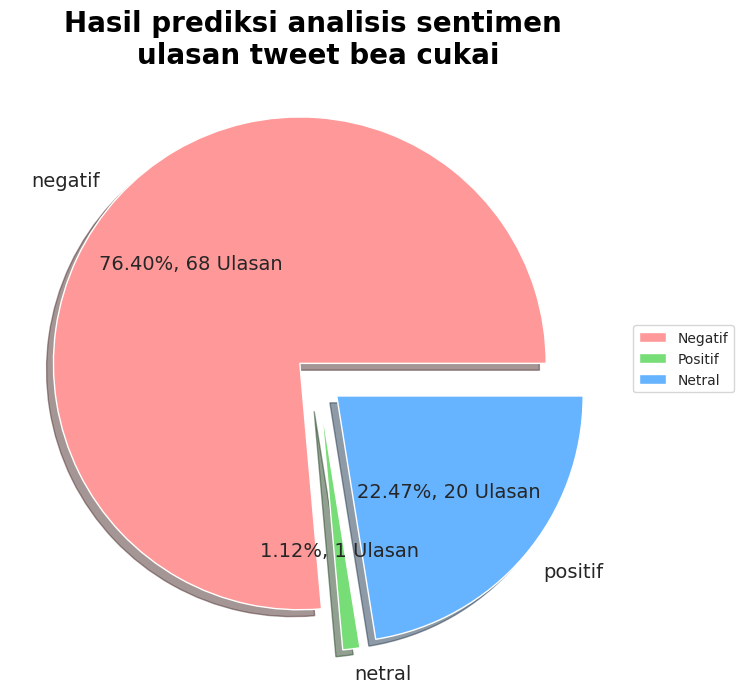

In [ ]:
import matplotlib.pyplot as plt

# Assuming prediction_df_group is your DataFrame
# prediction_df_group = ...

fig, ax = plt.subplots(figsize=(12, 8))

# Custom explode values for the pie chart
explode = [0.1] * len(prediction_df_group.sentimen)  # Explode all slices by the same amount

# Custom colors for the pie chart
my_colors = ['#ff9999', '#77dd77', '#66b3ff']

# Plotting the pie chart
ax.pie(prediction_df_group.sentimen,
       labels=prediction_df_group.predictvalues,
       autopct=lambda p: f'{p:.2f}%, {p * sum(prediction_df_group.sentimen) / 100:.0f} Ulasan',
       explode=explode,
       shadow=True,
       colors=my_colors,
       startangle=0,
       textprops={'fontsize': 14})

ax.set_title('Hasil prediksi analisis sentimen \nulasan tweet bea cukai',
             color='black',
             weight='bold',
             fontsize=20)

# Adding legend
plt.legend(bbox_to_anchor=(1, 0.6), labels=['Negatif', 'Positif', 'Netral'])

plt.show()


In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# explode = (0,0.1)
# my_colors = ['#ff9999','#77dd77','#77dd78']
# ax.pie(prediction_df_group.sentimen, labels=prediction_df_group.predictvalues,
#          autopct=lambda p:f'{p:.2f}%, {p*sum(prediction_df_group.sentimen)/100 :.0f} Ulasan', explode=explode, shadow=True, colors=my_colors,
#           startangle=0, textprops={'fontsize': 14})
# ax.set_title('Hasil prediksi analisis sentimen \nulasan tweet bea cukai', color='black',weight='bold',fontsize=20)

# plt.legend(bbox_to_anchor = (1,0.6),labels=['Negatif','Positif','Netral'])

# # plt.savefig('Hasilprediksi_tweet.png')
# plt.show()

Dapat dilihat bahwa model lebih banyak memprediksi ulasan baru sebagai sentimen negatif dibandingkan dengan positif dan netral. Penyebabnya adalah model lebih banyak belajar dan mengenali pola data ulasan yang negatif dibandingkan positif dan netral, sehingga model menjadi kurang mempelajari pola data ulasan yang positif dan netral.

# Confussion Matriks

In [ ]:
matrix = confusion_matrix(y_test, predict)
matrix

array([[51,  0,  1],
       [ 6,  1,  2],
       [11,  0, 17]])

In [ ]:
# pip install scikit-plot

Akurasi: 0.7752808988764045
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.75      0.98      0.85        52
      netral       1.00      0.11      0.20         9
     positif       0.85      0.61      0.71        28

    accuracy                           0.78        89
   macro avg       0.87      0.57      0.59        89
weighted avg       0.81      0.78      0.74        89

Confussion Matriks:
 [[51  0  1]
 [ 6  1  2]
 [11  0 17]]


<Axes: title={'center': 'Confussion Matriks'}, xlabel='Predicted label', ylabel='True label'>

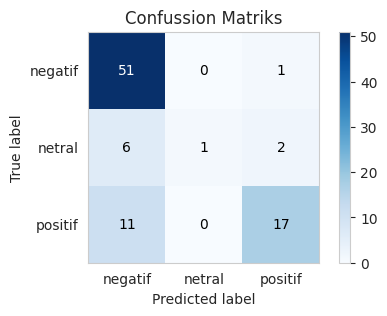

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import scikitplot as skplt
print("Akurasi:", accuracy_score(y_test, predict))
print("Laporan Klasifikasi:\n", classification_report(y_test, predict))
print("Confussion Matriks:\n", confusion_matrix(y_test, predict))
skplt.metrics.plot_confusion_matrix(y_test, predict, normalize=False, title = 'Confussion Matriks',figsize=(5,3))

## COBA DecisionTree

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
decissiontree = DecisionTreeClassifier()
decissiontree.fit(X_train_vect, y_train)

DecisionTreeClassifier()

Akurasi: 0.5842696629213483
Laporan Klasifikasi:
               precision    recall  f1-score   support

     negatif       0.79      0.58      0.67        52
      netral       0.19      0.44      0.27         9
     positif       0.60      0.64      0.62        28

    accuracy                           0.58        89
   macro avg       0.53      0.55      0.52        89
weighted avg       0.67      0.58      0.61        89

Confussion Matriks:
 [[30 12 10]
 [ 3  4  2]
 [ 5  5 18]]


<Axes: title={'center': 'Confussion Matriks'}, xlabel='Predicted label', ylabel='True label'>

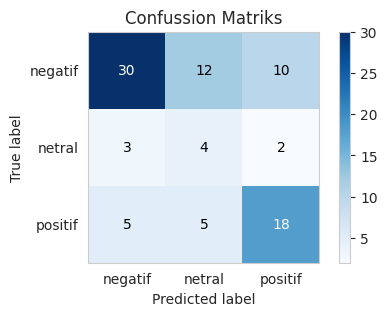

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import scikitplot as skplt
ypred = decissiontree.predict(X_test_vect)
print("Akurasi:", accuracy_score(y_test, ypred))
print("Laporan Klasifikasi:\n", classification_report(y_test, ypred))
print("Confussion Matriks:\n", confusion_matrix(y_test, ypred))
skplt.metrics.plot_confusion_matrix(y_test, ypred, normalize=False, title = 'Confussion Matriks',figsize=(5,3))